In [9]:
#imports necesary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pygal
import country_converter as coco
from pygal.maps.world import World
from sklearn.preprocessing import LabelEncoder

In [10]:
#gets the csv and merges them
df1 = pd.read_csv('articleInfo.csv')
df2 = pd.read_csv('authorInfo.csv')
df = pd.merge(df1, df2, on = 'Article No.', how = 'outer')
df = df.fillna(0)
df.head(5)


,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0.0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0.0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0.0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0.0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0.0


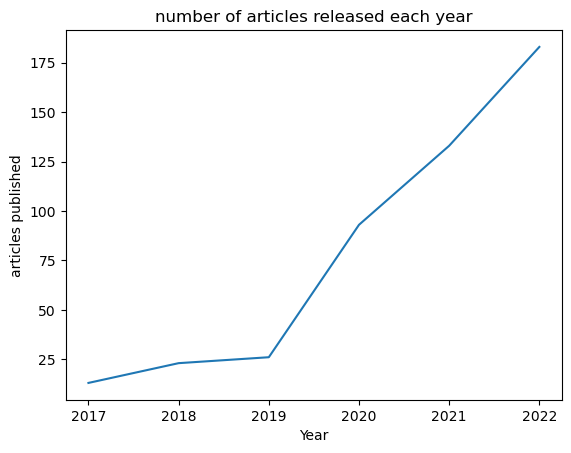

In [11]:

#groups by the year and finds number of articles
df3 = df.groupby('Year').count()
plt.plot(df3['Article No.'])
plt.xlabel('Year')
plt.ylabel('articles published')
plt.title('number of articles released each year')
plt.show()

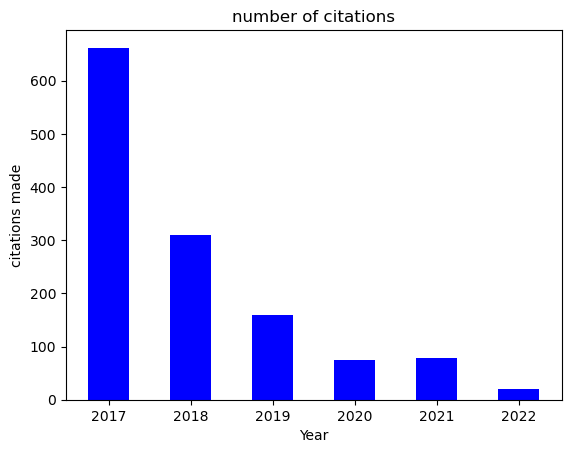

In [12]:
#plots data for number of citations every year
df4 = df[['Year', 'Citation']]
plt.bar(df['Year'], df['Citation'], width=0.5, color='b')

plt.xlabel('Year')
plt.ylabel('citations made')
plt.title('number of citations')
plt.show()

In [59]:
from collections import Counter
import pygal.maps.world
import country_converter as coco
from pygal.style import Style

#organizes data to add to countries map
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'publications in each country'
countries = coco.convert(names=df['Country'], to='ISO2', not_found='None') 
countries = [s.lower() for s in countries]
counts = Counter(countries)

# Convert the counts to a dictionary using a dictionary comprehension
counts_dict = {country: count for country, count in counts.items()}

print(counts_dict) 
del counts_dict['none']

#adds the data to a map
worldmap_chart.add('Publications per country', counts_dict)


#Render the map to an SVG file
worldmap_chart.render_to_file('map.svg')

Chian not found in regex
Bristol not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
Denamrk not found in regex
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 not found in ISOnumeric
0 no

{'tw': 13, 'kr': 3, 'za': 17, 'gb': 30, 'us': 62, 'cy': 7, 'cn': 34, 'de': 26, 'mx': 3, 'es': 19, 'it': 19, 'ua': 6, 'none': 95, 'ie': 17, 'au': 13, 'hk': 8, 'cl': 9, 'fr': 7, 'ca': 12, 'nz': 6, 'il': 1, 'dk': 5, 'cz': 15, 'li': 2, 'no': 2, 'ps': 1, 'sk': 7, 'ru': 5, 'kg': 1, 'my': 6, 'pk': 6, 'gr': 5, 'in': 3, 'ch': 5, 'ae': 1}


In [44]:
institution = df[['Author Affiliation', 'Author Number']]
institution = institution.groupby('Author Affiliation').count() 
institution = institution.sort_values('Author Number', ascending=False)
#prints the 5 institutions with the most publications
institution.head(6)


,Author Number
Author Affiliation,
0,84
University of the Western Cape,17
Masaryk University,12
University College Cork,11
Intel Corporation,11
Madigan Army Medical Center,8


In [45]:
score = df[['Author Name', 'h-index']]
score = score.sort_values('h-index', ascending=False)
#prints the 5 authors with biggest h-index
score.head(5)

,Author Name,h-index
117,Ulrich Trautwein,95.0
102,Nicolas Molinari,63.0
130,George S. Athwal,59.0
147,Vicente A. González,33.0
140,Maria Luisa Lorusso,33.0


In [56]:
#imports libraries for regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

data = pd.read_csv('data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')] 
y = data['SUS']
x = data.drop(columns='SUS')
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.5374621154657988


In [57]:
import statsmodels.api as sm
#sets up x and y variables
y = data['SUS'] 
x = data.drop(columns='SUS') 

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:04:52   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [52]:
#imports libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#sets the x and y variables for classification
y = data['Purchase'].to_numpy()
X = data.drop('Purchase', axis = 1).to_numpy()
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

#breaks data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)
lc = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [53]:

#trains and tests classification models
lc.fit(X_train, y_train)
neigh.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_knn_predicted = neigh.predict(X_test)
y_knn_pred_proba = neigh.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.81      0.90        16

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

              preci

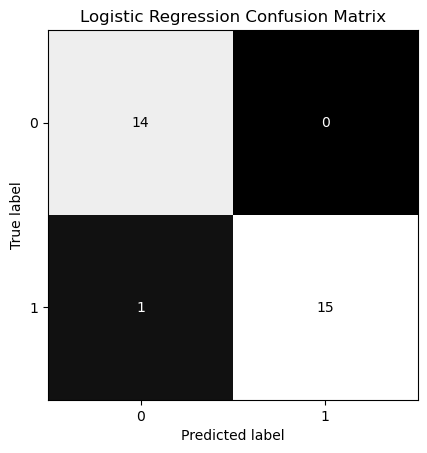

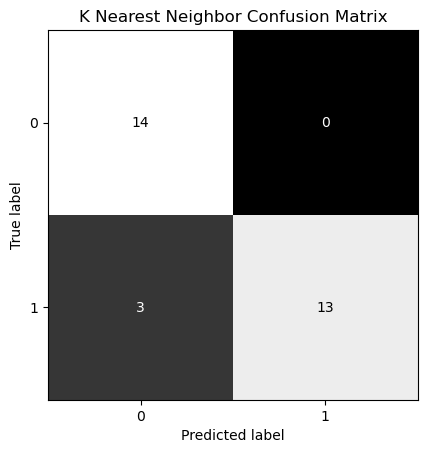

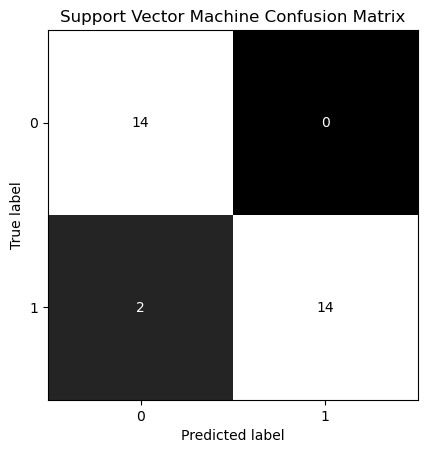

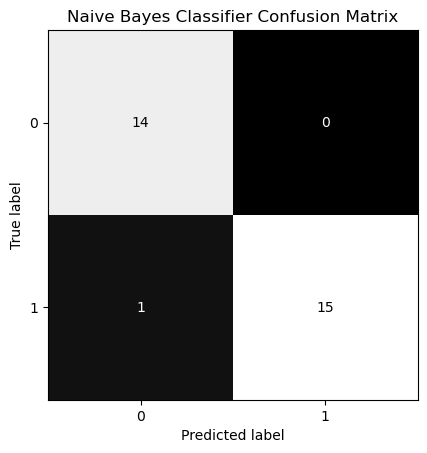

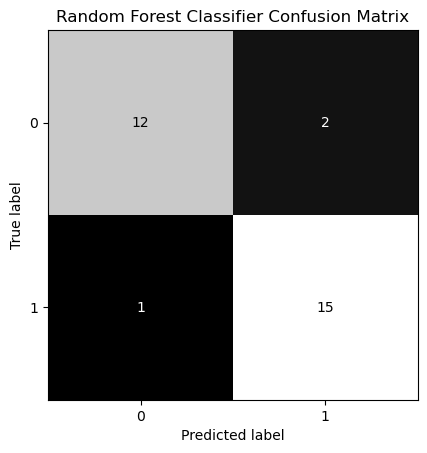

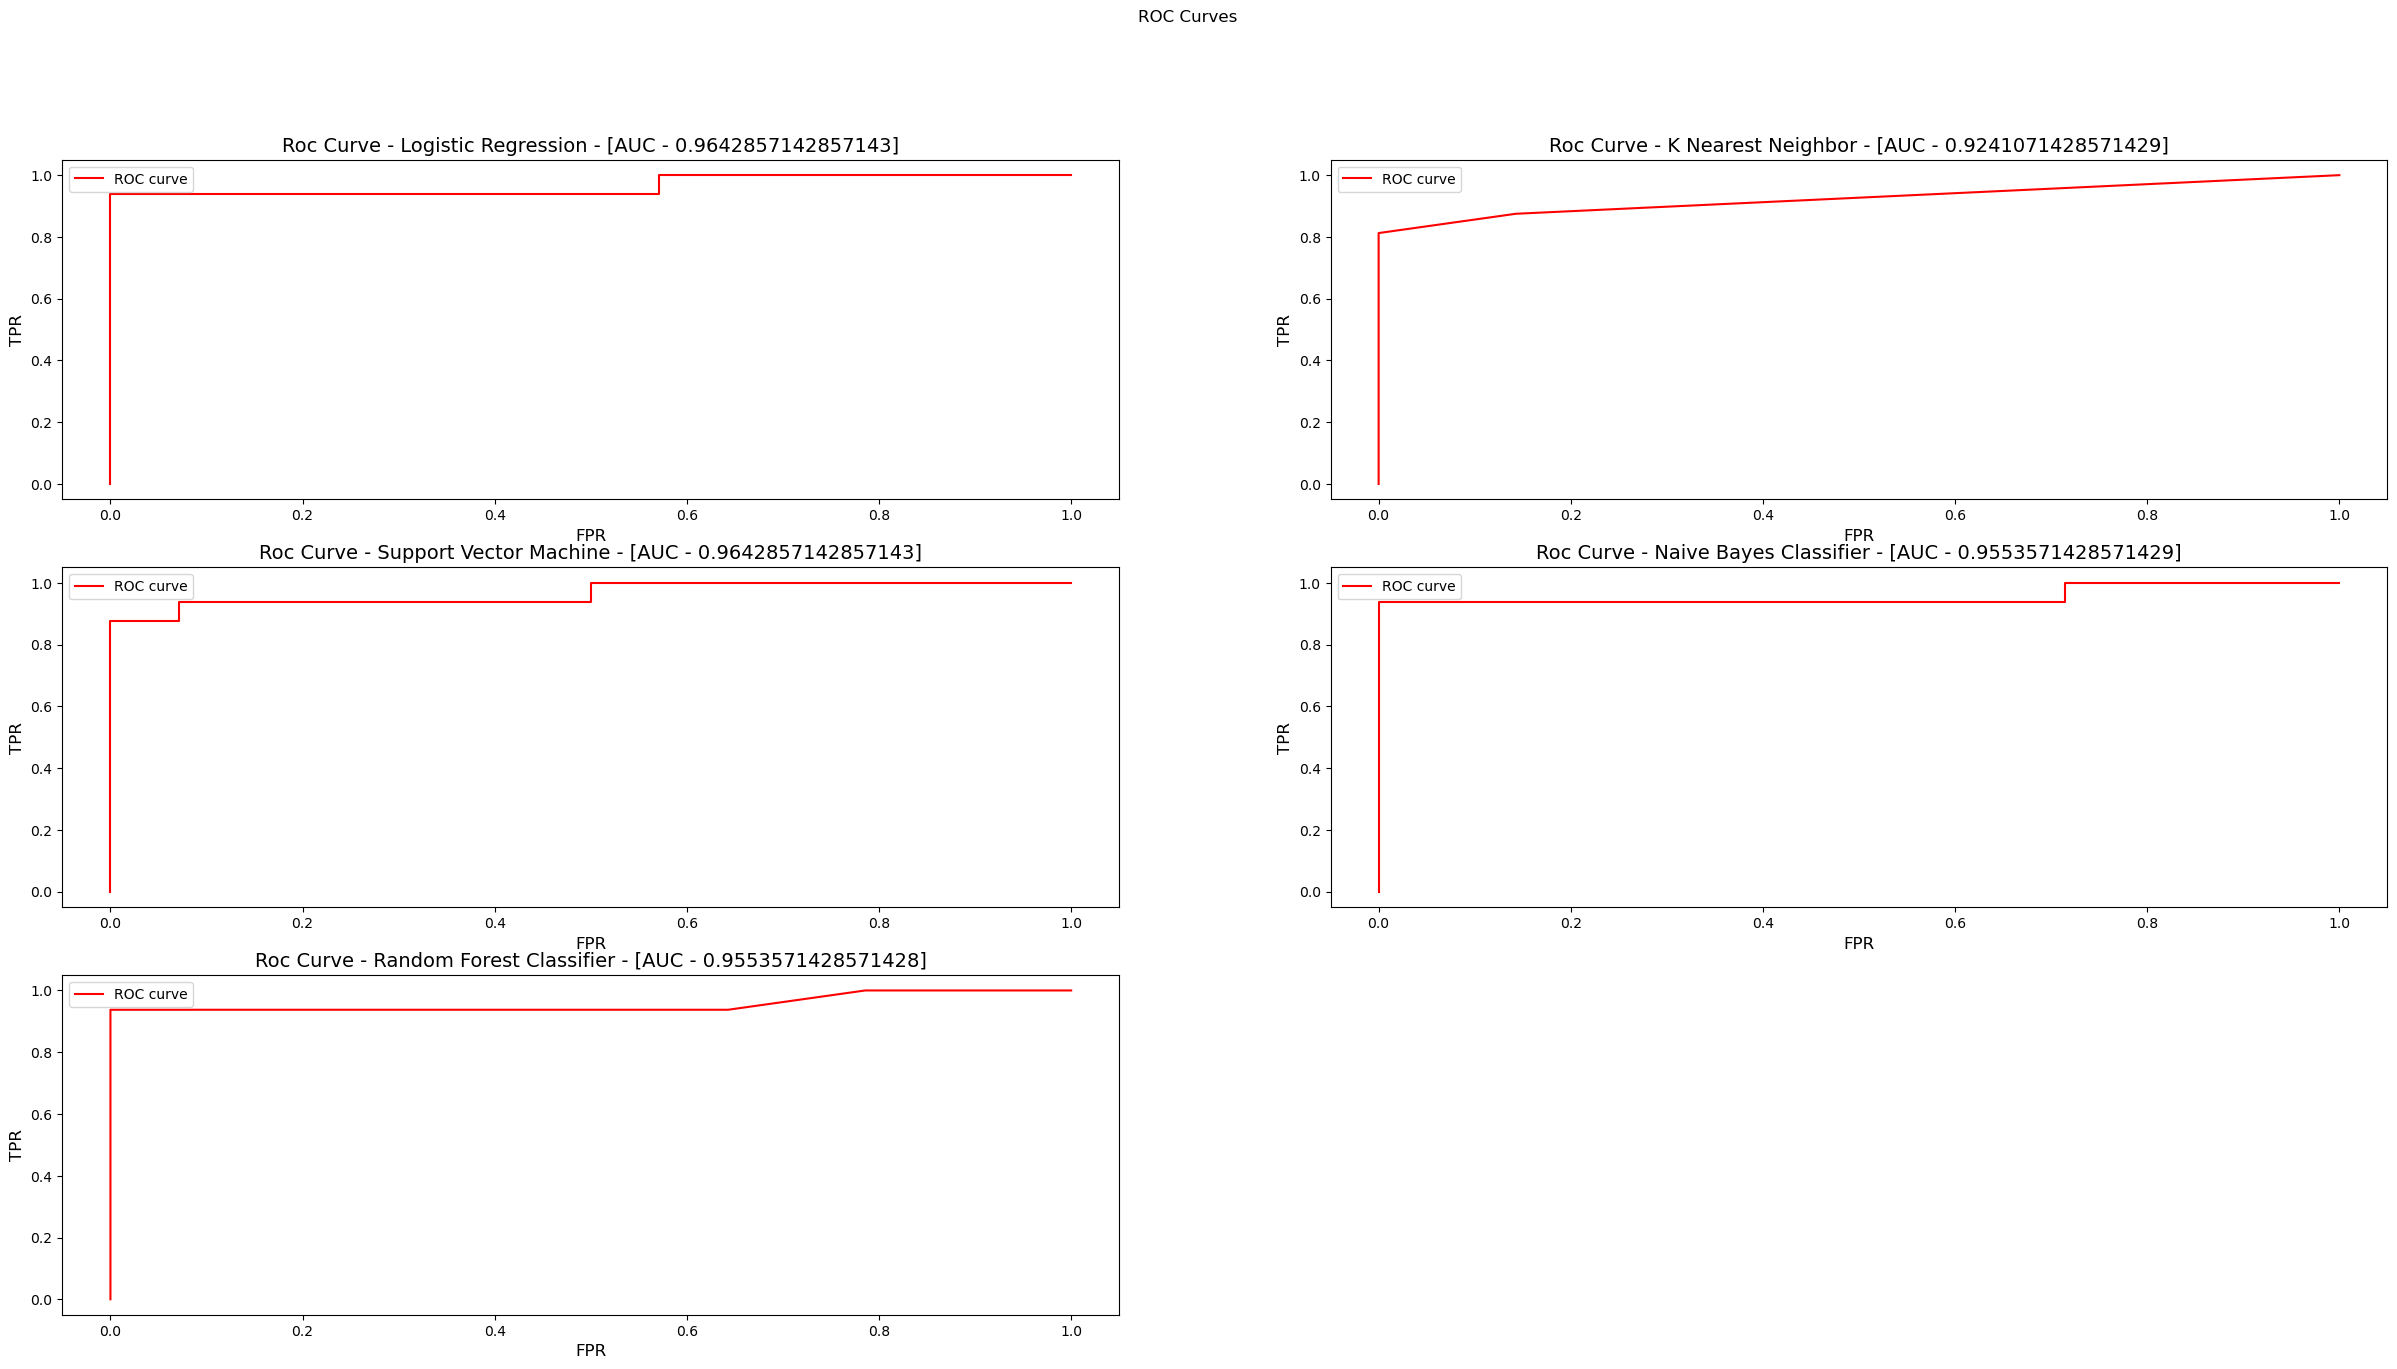

In [54]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_knn_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()